

# `K-means --------------------------------------------------------`
### Choosing number of clusters:
- **Elboow method/WSS ( Within sum of square errors )**: Through it i can determine no of clusters I want to build my model
- **Silhoutte method**: Through it i can determine no of clusters I want to build my model
![](https://miro.medium.com/max/1280/1*rwYaxuY-jeiVXH0fyqC_oA.gif)

In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [28]:
data = pd.read_csv('Mall_Customers.csv')
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [29]:
data.drop(['CustomerID'],axis=1,inplace=True)

In [30]:
data.isnull().sum()

Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

Text(0.5, 1.0, 'Age')

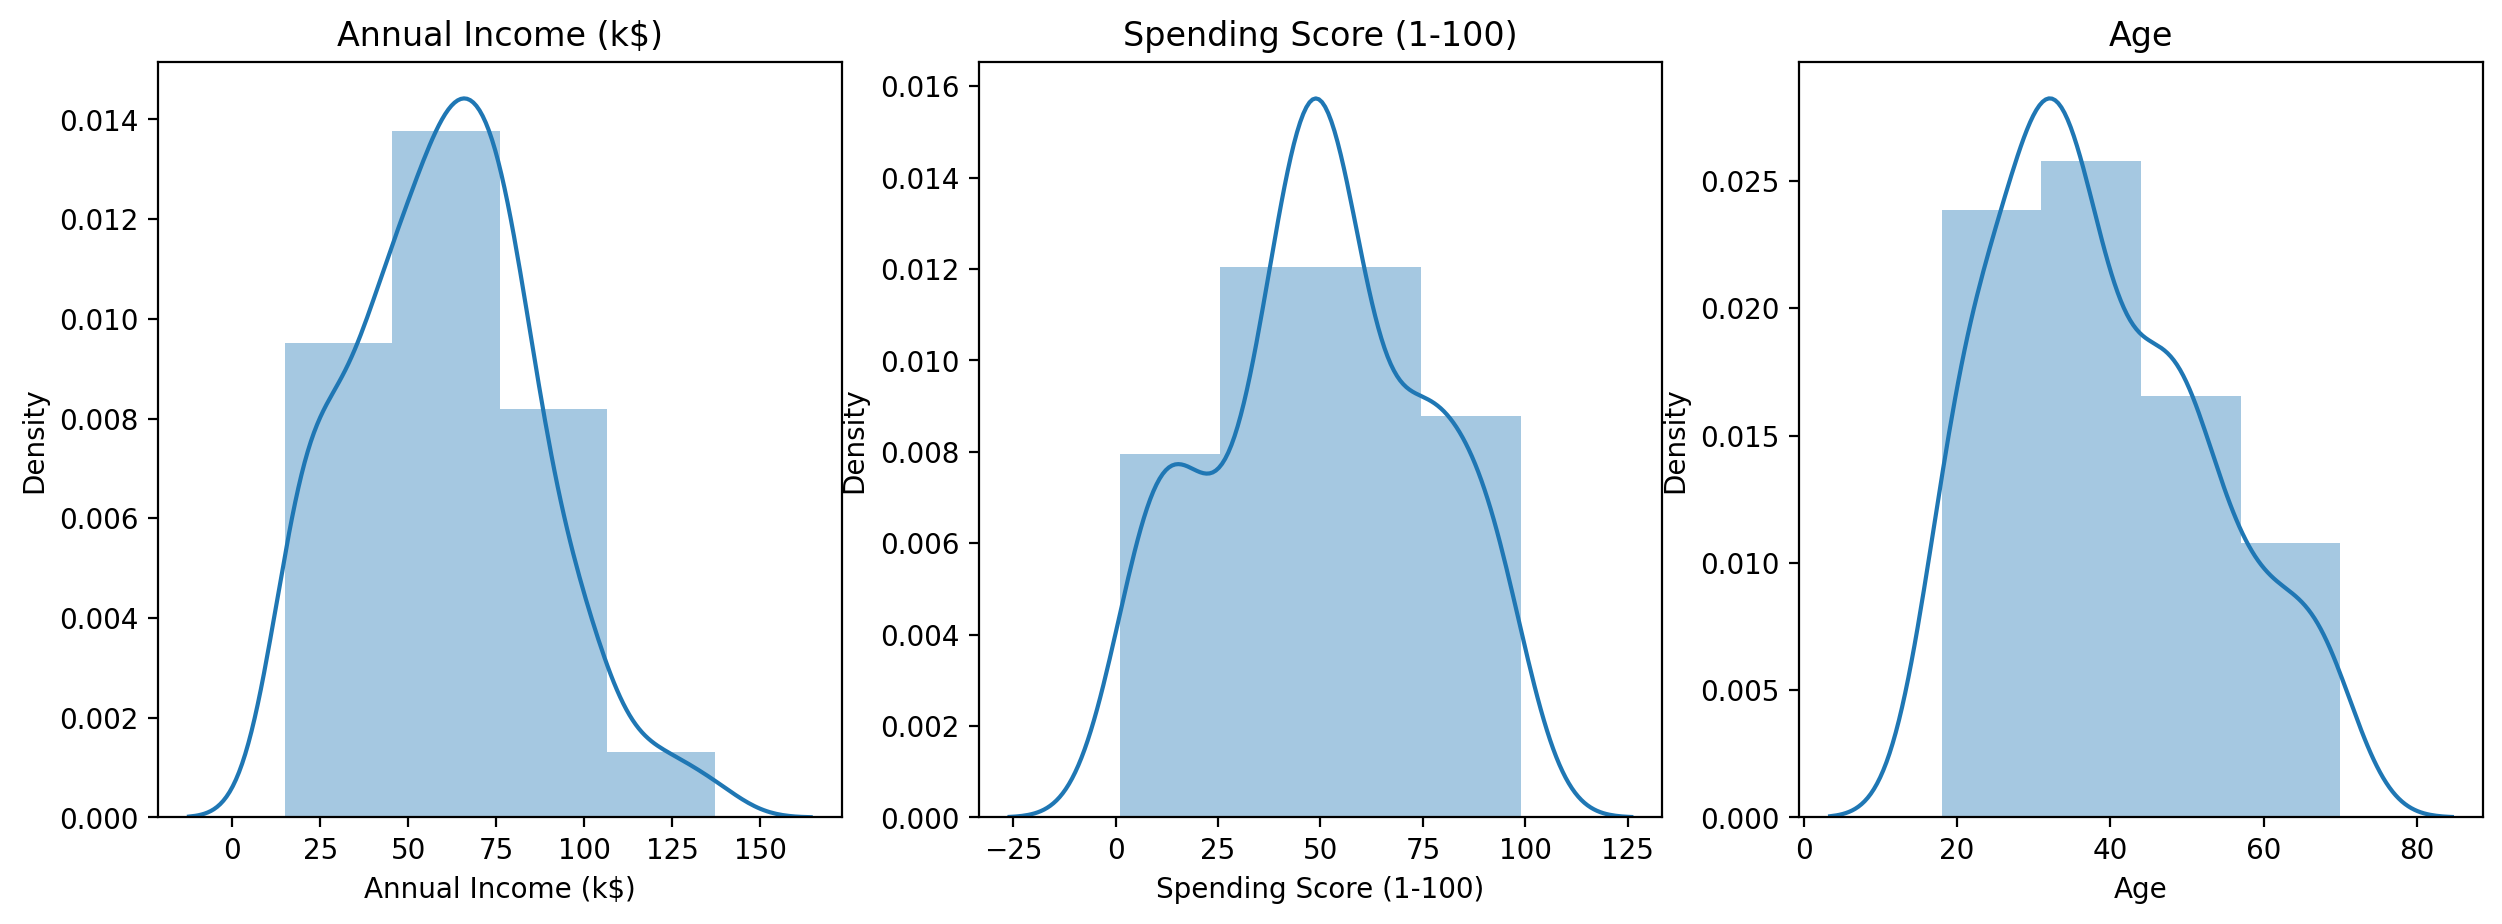

In [31]:
plt.figure(figsize=(15,5),dpi=200)
plt.subplot(1,3,1)
sns.distplot(data['Annual Income (k$)'],bins=4)
plt.title('Annual Income (k$)')

plt.subplot(1,3,2)
sns.distplot(data['Spending Score (1-100)'],bins=4)
plt.title('Spending Score (1-100)')

plt.subplot(1,3,3)
sns.distplot(data['Age'],bins=4)
plt.title('Age')

### `K-means algo cannot work with outliers`

In [32]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
data['Genre'] = lb.fit_transform(data['Genre'])

In [33]:
data.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


### `Basic Modeling ( Selecting K values manually ) -----------------`

In [34]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [35]:
km = KMeans(n_clusters=3,random_state=0,init='k-means++')
km.fit(data)

KMeans(n_clusters=3, random_state=0)

In [36]:
np.round(km.cluster_centers_)   # x,y,z,w four dimension

array([[ 1., 40., 87., 19.],
       [ 0., 33., 87., 82.],
       [ 0., 40., 44., 50.]])

### `taken 3 clusters, so 3 rows`
### `4 columns, therefore  dimensions`

`If you want to predict cluster id, which of the datapoint are contributing to which id`

In [37]:
cluster_id = km.predict(data)

In [38]:
cluster_id

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1])

In [39]:
data['cluster_id'] = cluster_id

In [40]:
data.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100),cluster_id
0,1,19,15,39,2
1,1,21,15,81,2
2,0,20,16,6,2
3,0,23,16,77,2
4,0,31,17,40,2


In [41]:
data.drop('cluster_id',axis=1,inplace=True)

### `Finding optimum k-value by WSS and K-means Method -------------------`
### `Elbow Method`

In [42]:
wss = []

for i in range(2,12):
    km = KMeans(n_clusters=i,random_state=0,init='k-means++')
    km.fit(data)
    wss.append(km.inertia_)

Text(0.5, 1.0, 'Elbow Method')

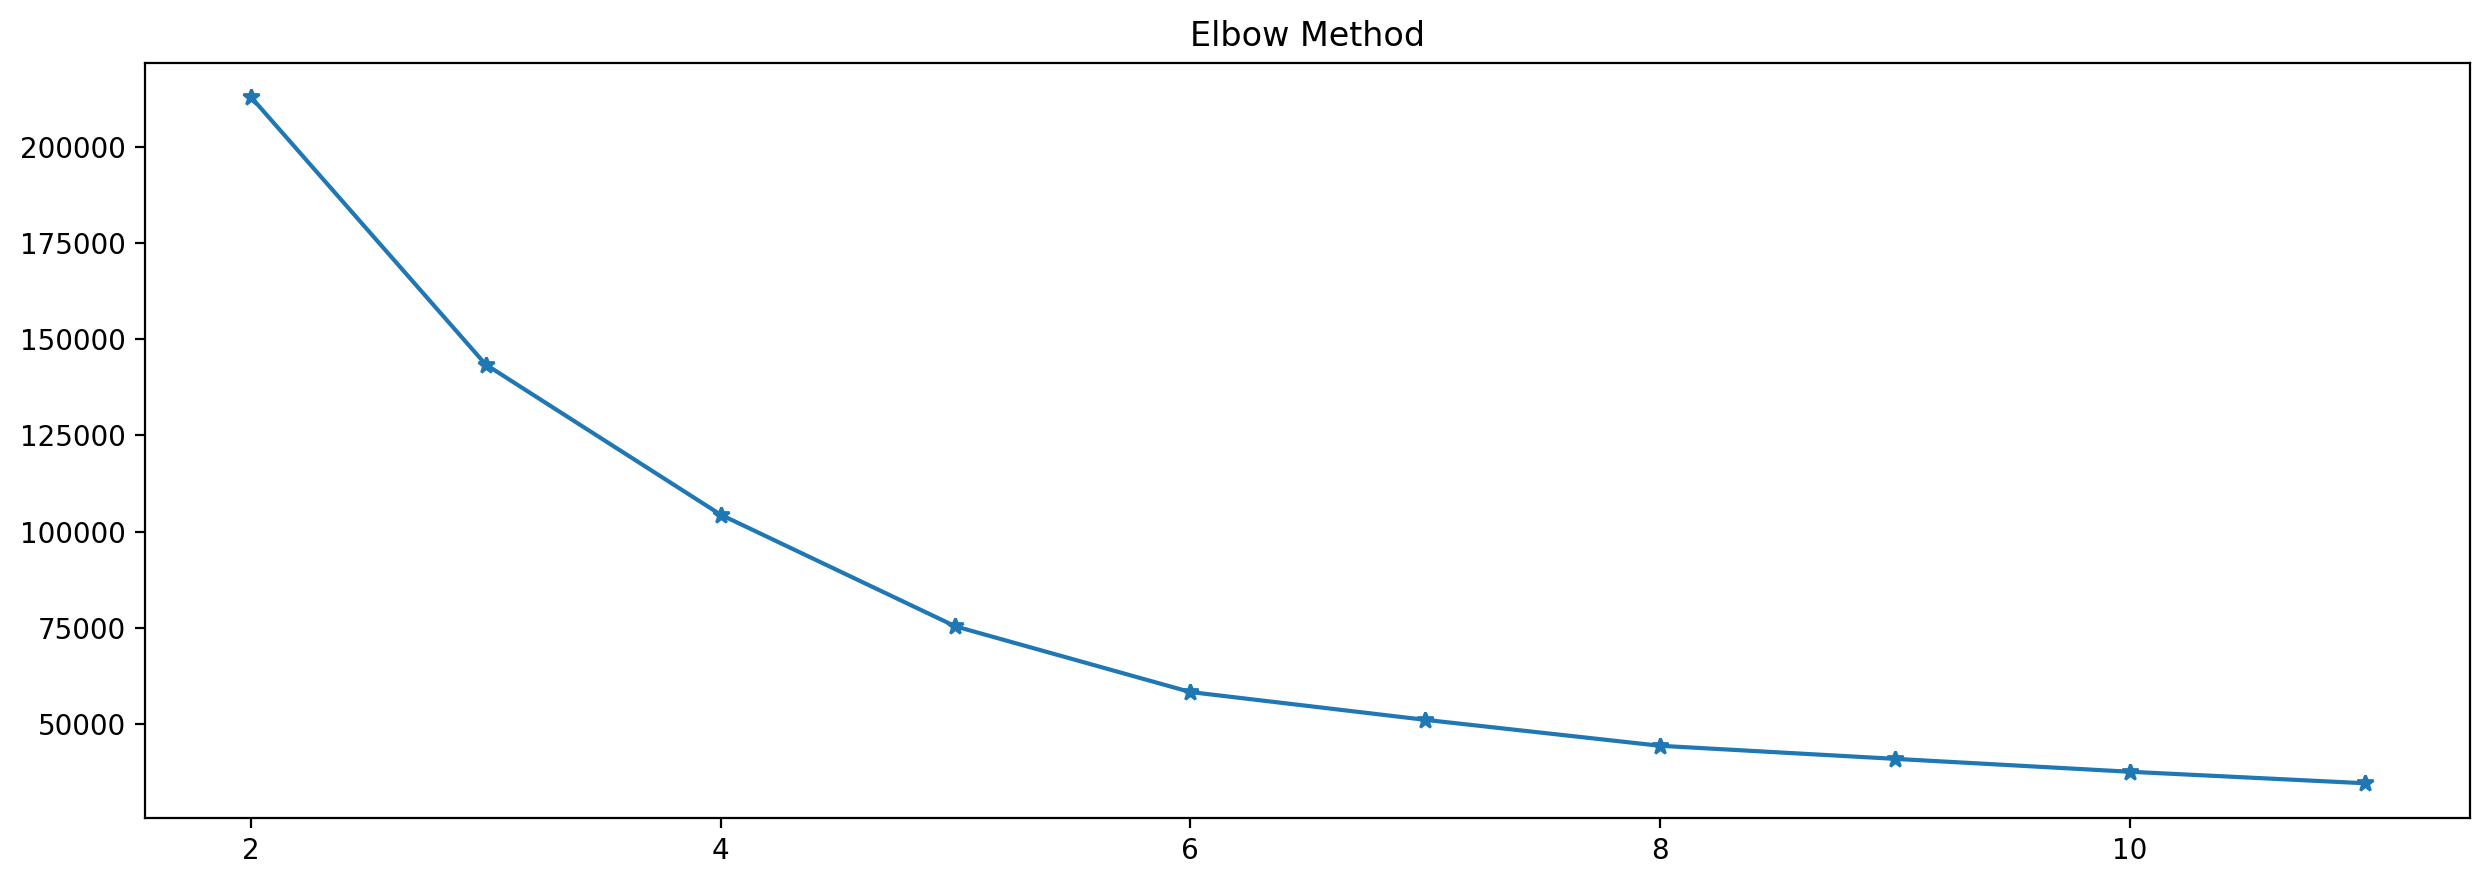

In [43]:
plt.figure(figsize=(15,5),dpi=200)
plt.plot(range(2,12),wss,marker='*')
plt.title('Elbow Method')

### `Silhoutte method`

In [44]:
Silhoutte_scores = []

for i in range(2,12):
    km = KMeans(n_clusters=i,random_state=0,init='k-means++')
    km.fit(data)
    cluster_id = km.predict(data)
    scores = silhouette_score(data,cluster_id)
    Silhoutte_scores.append(scores)

Text(0.5, 1.0, 'Silhouette Method')

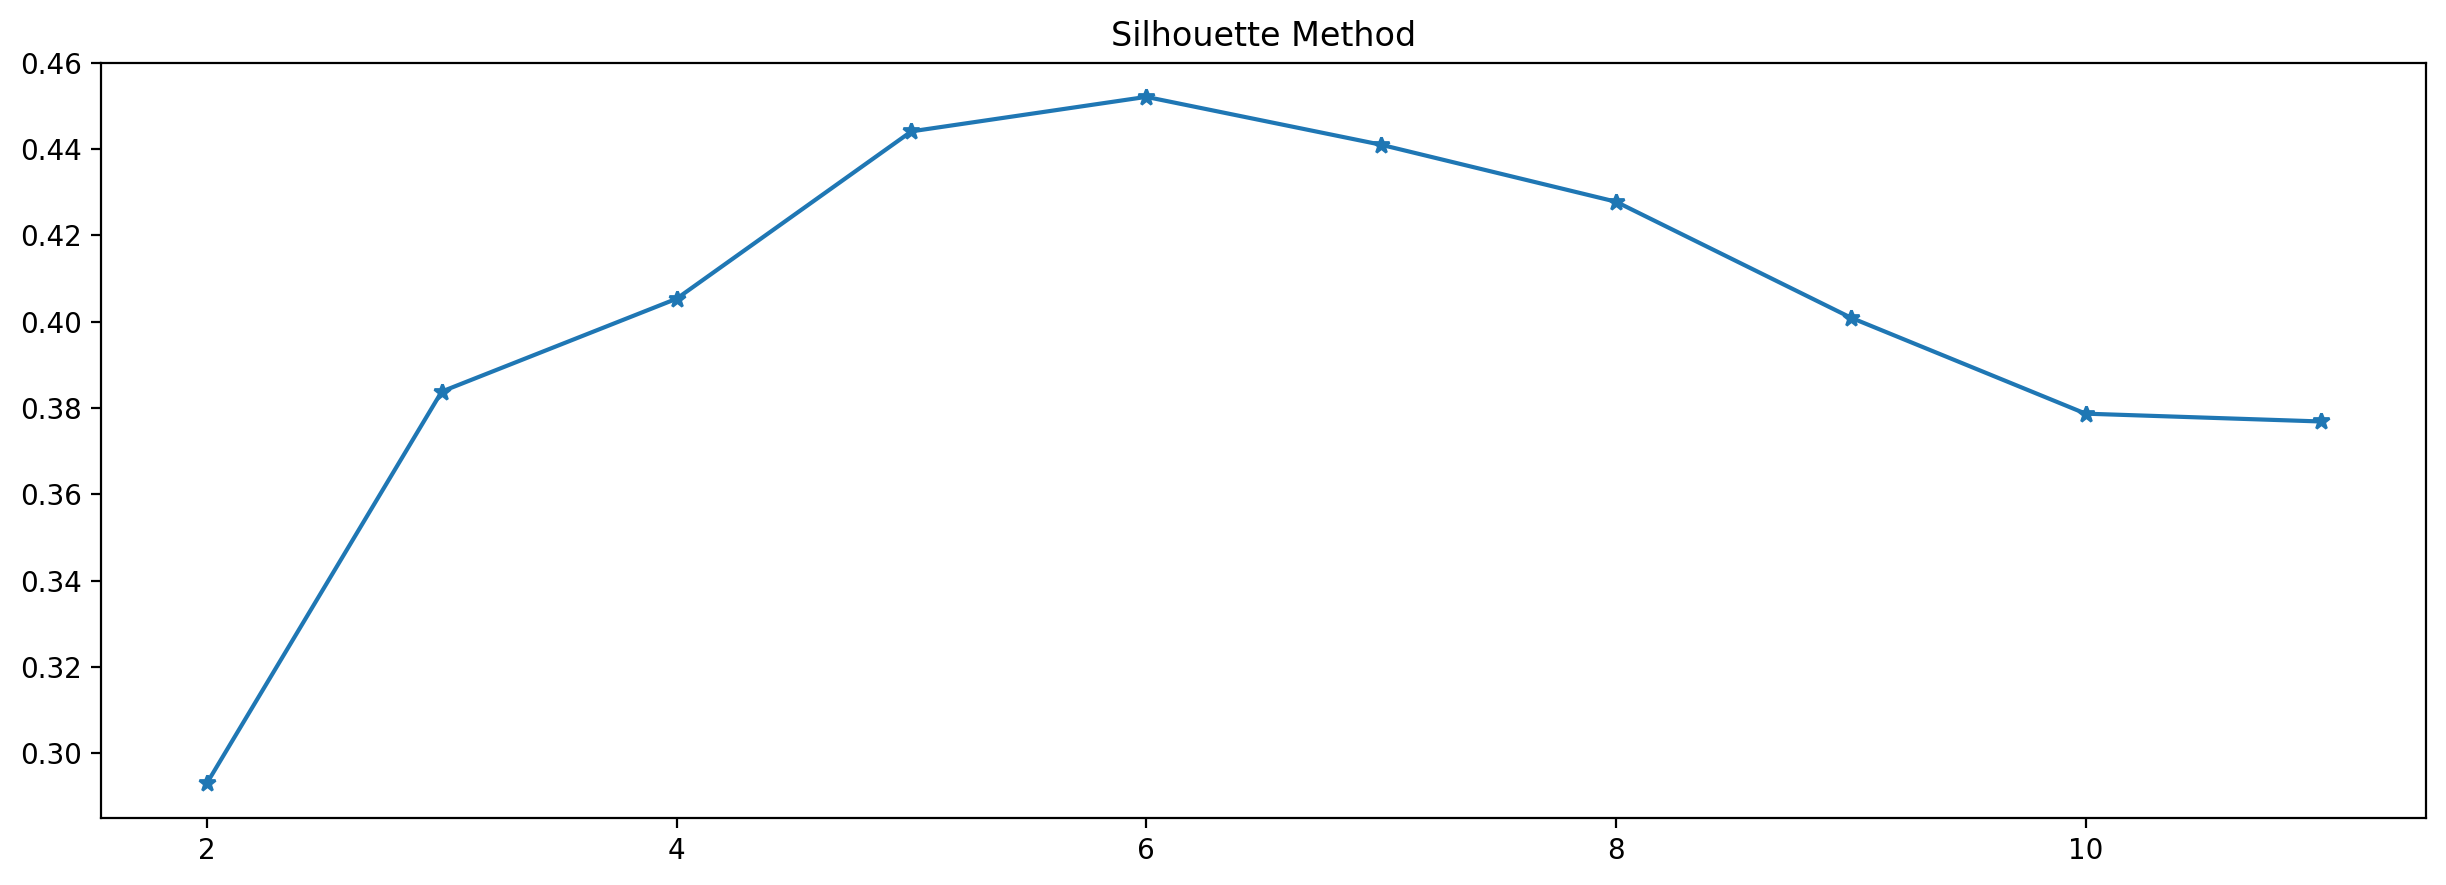

In [45]:
plt.figure(figsize=(15,5),dpi=200)
plt.plot(range(2,12),Silhoutte_scores,marker='*')
plt.title('Silhouette Method')

### `Final Fit`

In [46]:
km_final = KMeans(n_clusters=6,random_state=0,init='k-means++')
labels = km_final.fit_predict(data)

In [47]:
data['cluster_id'] = labels

In [48]:
data.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100),cluster_id
0,1,19,15,39,5
1,1,21,15,81,4
2,0,20,16,6,5
3,0,23,16,77,4
4,0,31,17,40,5


### `Plotting 2D`

In [49]:
X = data[['Annual Income (k$)','Spending Score (1-100)']].values
y_kmeans = data['cluster_id']

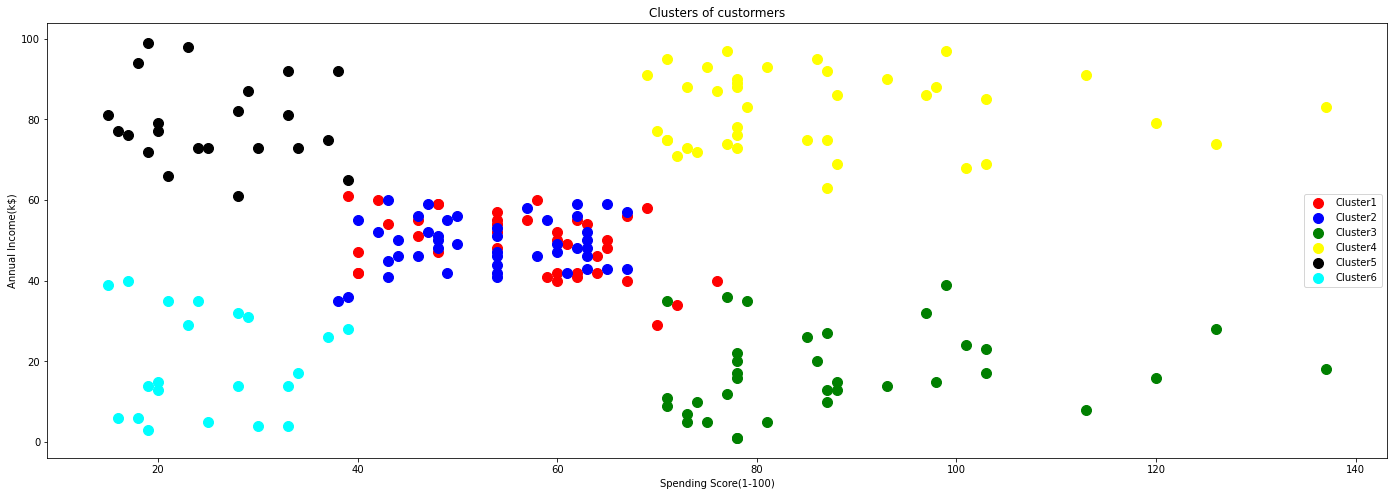

In [50]:
plt.figure(figsize=(24,8))
plt.scatter(X[y_kmeans == 0,0],X[y_kmeans == 0,1],s=100,c='red',label='Cluster1')
plt.scatter(X[y_kmeans == 1,0],X[y_kmeans == 1,1],s=100,c='blue',label='Cluster2')
plt.scatter(X[y_kmeans == 2,0],X[y_kmeans == 2,1],s=100,c='green',label='Cluster3')
plt.scatter(X[y_kmeans == 3,0],X[y_kmeans == 3,1],s=100,c='yellow',label='Cluster4')
plt.scatter(X[y_kmeans == 4,0],X[y_kmeans == 4,1],s=100,c='black',label='Cluster5')
plt.scatter(X[y_kmeans == 5,0],X[y_kmeans == 5,1],s=100,c='cyan',label='Cluster6')
plt.title('Clusters of custormers')
plt.ylabel('Annual Income(k$)')
plt.xlabel('Spending Score(1-100)')
plt.legend()
plt.show()

### `Plotting 3D`

In [51]:
import plotly.express as px
px.scatter_3d(data,x='Annual Income (k$)',y='Spending Score (1-100)',z='Age',color='cluster_id')

## `Important Notes`:
### [Anomaly detection using Isolation Forest *****](https://www.analyticsvidhya.com/blog/2021/07/anomaly-detection-using-isolation-forest-a-complete-guide/)
